In [1]:
%matplotlib inline
from obspy import read, UTCDateTime as UTC
from obspy.signal.cross_correlation import correlation_detector
%matplotlib inline
import obspy
import io
import matplotlib.pyplot as plt
import helpers
import numpy as np
import pandas as pd

from obspy.signal import trigger
from obspy.signal import filter

In [2]:
paths = [
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138',
#     '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.138',
# '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.138',
# '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.138',
# '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.138',
# '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.138'
]
stream_b00 = obspy.read(paths[0])
for p in paths[1:]:
    stream_b00 = stream_b00 + obspy.read(p)

# this action destroys the raw data
# the wires were crossed on the hydrophone this fixes it
# stream_b00[3].data = stream_b00[3].data.max() - stream_b00[3].data
try:
    stream_b00[3].data = -1 * stream_b00[3].data
except IndexError:
    print('there isnt that many hydrophones in the data set')
    
# this action destroys raw data and only demeaned data is left
stream_b00.detrend('demean')

# this action destroys raw data and only normalized data is left
stream_b00.normalize()

# perform a highpass filter at 5Hz on the data
for t in stream_b00:
#     t.data = filter.highpass(t, freq=320, df=1000)
    t.data = filter.highpass(t, freq=40, df=1000)

there isnt that many hydrophones in the data set


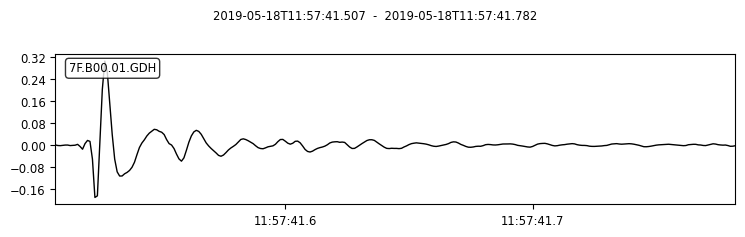

In [8]:
template = stream_b00.copy()
pick = UTC('2019-05-18T11:57:41.532000Z')
template = template.trim(pick-0.025, pick+0.25)
_ = template.plot()
template_tr = template[0].copy()

In [9]:
from datetime import datetime


started at 2021-08-23 15:54:28.378606


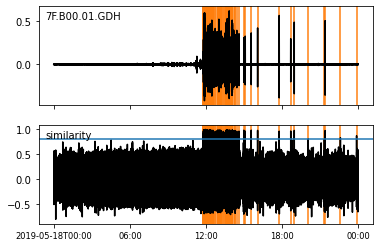

that took 0:00:18.399075
number of detections 277


In [10]:
start = datetime.now()
print('started at', str(start))
height = 0.8
distance = 3
#these should both be streams not traces
detections, sims = correlation_detector(stream=stream_b00
                                        , templates=template
                                        , heights=height
                                        , distance=distance
                                        , plot=stream_b00)

print('that took', str(datetime.now() - start))
print('number of detections', len(detections))

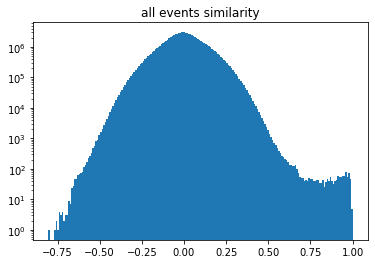

In [11]:
z = plt.hist(sims[0].data, bins=200)
plt.title('all events similarity')
plt.yscale('log')

Text(0.5, 1.0, 'detected events similarity')

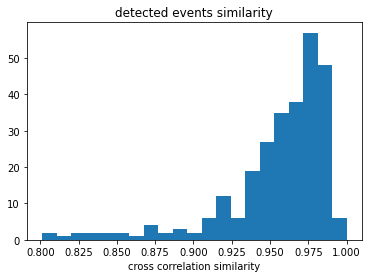

In [12]:
ax = pd.DataFrame(detections).similarity.hist(bins=21, grid=False)
ax.set_xlabel('cross correlation similarity')
ax.set_title('detected events similarity')